<a href="https://colab.research.google.com/github/PythonJulianPrieto/CienciaDeDatos/blob/main/NaiveBase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=55e7ec232f689673d7a364d318f2f96aaf841c564d315f0c36d31e690bedbe36
  Stored in directory: /root/.cache/pip/wheels/d5/b2/a9/590d15767d34955f20a9a033e8db973b79cb5672d95790c0a9
Successfully built sklearn


#***CARGAR LIBRERIAS***

In [2]:
#Importamos librerias genericas de Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
import joblib
%matplotlib inline

#Importamos las librerias sklearn para el modelo 
from sklearn.model_selection import train_test_split ##Separa la data de entrenamiento y datos de validacion
from sklearn.naive_bayes import GaussianNB ##MODELO 
from sklearn.feature_selection import SelectKBest##Selecciona las mejores columnas/caracteristicas bajo una recomendación

##Metricas de validacion de los modelso de clasificación
#Métricas de validación simple
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

#Validación cruzada

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


from sklearn.metrics import roc_auc_score

#Realizar preprocesamiento

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/adiacla/bigdata/master/comprar_alquilar.csv', sep=',')

In [4]:
df.head(10)

,ingresos,gasto_ppal,vehiculo,otros_gastos,ahorros,Valor_vivienda,estado_civil,hijos,trabajo,comprara
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


<Axes: >

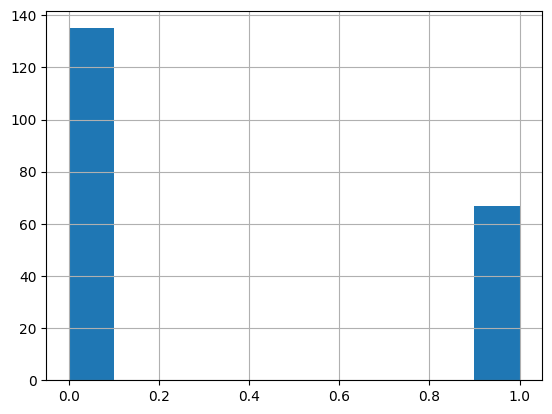

In [5]:
df['comprara'].hist()

In [6]:
#1 Analizar si la etiqueta esta balanceada o no en el campo de la etiqueta?
df.groupby('comprara').size()

comprara
0    135
1     67
dtype: int64

array([[<Axes: title={'center': 'ingresos'}>,
        <Axes: title={'center': 'gasto_ppal'}>,
        <Axes: title={'center': 'vehiculo'}>],
       [<Axes: title={'center': 'otros_gastos'}>,
        <Axes: title={'center': 'ahorros'}>,
        <Axes: title={'center': 'Valor_vivienda'}>],
       [<Axes: title={'center': 'estado_civil'}>,
        <Axes: title={'center': 'hijos'}>,
        <Axes: title={'center': 'trabajo'}>],
       [<Axes: title={'center': 'comprara'}>, <Axes: >, <Axes: >]],
      dtype=object)

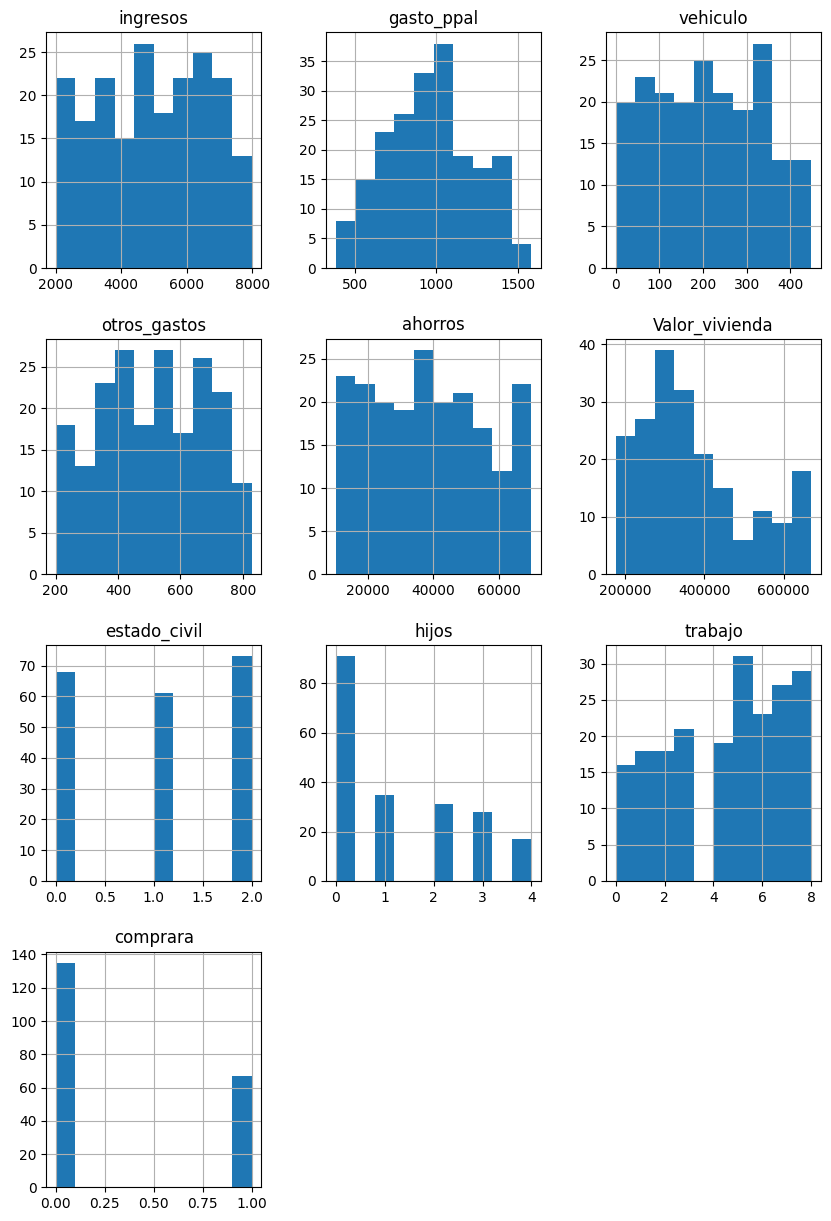

In [7]:
#2 Distribucion de Frecuencias
df.hist(figsize=(10,15))

In [8]:
df.columns

Index(['ingresos', 'gasto_ppal', 'vehiculo', 'otros_gastos', 'ahorros',
       'Valor_vivienda', 'estado_civil', 'hijos', 'trabajo', 'comprara'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gasto_ppal      202 non-null    int64
 2   vehiculo        202 non-null    int64
 3   otros_gastos    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   Valor_vivienda  202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprara        202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [10]:
df['gastos'] = df['gasto_ppal']+df['vehiculo']+df['otros_gastos']
df['gastos']

0      1600
1      1496
2      1926
3      1547
4      1606
       ... 
197    1530
198    1775
199    1915
200    1888
201    1644
Name: gastos, Length: 202, dtype: int64

In [11]:
df['valor_a_financiar'] = df['Valor_vivienda']-df['ahorros']
df['valor_a_financiar']

0      350000
1      593657
2      264316
3      606427
4      307420
        ...  
197    352397
198    258541
199    352460
200    356907
201    245600
Name: valor_a_financiar, Length: 202, dtype: int64

In [12]:
dfMinable = df.drop(['Valor_vivienda','ahorros','gasto_ppal','vehiculo','otros_gastos'], axis = 1)

In [13]:
dfMinable

,ingresos,estado_civil,hijos,trabajo,comprara,gastos,valor_a_financiar
0,6000,0,2,2,1,1600,350000
1,6745,1,3,6,0,1496,593657
2,6455,2,1,8,1,1926,264316
3,7098,0,0,3,0,1547,606427
4,6167,0,0,3,1,1606,307420
...,...,...,...,...,...,...,...
197,3831,0,0,2,0,1530,352397
198,3961,2,3,8,0,1775,258541
199,3184,1,3,8,0,1915,352460
200,3334,1,2,5,0,1888,356907


In [14]:
#Separar los features/Caracteristicas de campo etiqueta

#Normalmente los cientificos de datos asignan X mayuscula a los features y 'Y' mayusculas
X = dfMinable.drop(['comprara'],axis=1)
y = dfMinable['comprara']

In [15]:
X

,ingresos,estado_civil,hijos,trabajo,gastos,valor_a_financiar
0,6000,0,2,2,1600,350000
1,6745,1,3,6,1496,593657
2,6455,2,1,8,1926,264316
3,7098,0,0,3,1547,606427
4,6167,0,0,3,1606,307420
...,...,...,...,...,...,...
197,3831,0,0,2,1530,352397
198,3961,2,3,8,1775,258541
199,3184,1,3,8,1915,352460
200,3334,1,2,5,1888,356907


#Crear el modelo

In [16]:
##Dividir los datos en un porcentaje para entrenar y un porcentaje para validar (80) (20)
#X_train, Y_train son los datos para entrenar
#X_train caracteristicas para entrenar
#y_train Etiquetas para entrenar
#x_test y y_test Contienen los datos para validar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=124)

In [17]:
X_test.shape

(41, 6)

In [18]:
#Creando el primer modelo, asignarselo a los valores y entrenar
gnb = GaussianNB()
gnb.fit(X_train.values,y_train)

GaussianNB()

#Realizar prediccion con los datos de prueba y VALIDAR el modelo

In [19]:
yPrediccion = gnb.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [20]:
yPrediccion

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [21]:
y_test.to_numpy()

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [22]:
#Matriz de confución
matrix = confusion_matrix(y_test,yPrediccion)

In [23]:
matrix_df = pd.DataFrame(matrix)


In [24]:
matrix_df

,0,1
0,28,0
1,1,12


In [25]:
matrix_df.columns = ['0 No comprara REAL','1 si comprara Real']

In [26]:
matrix_df.rename(index={0:'No comprara Pred', 1:'Comprara pred'})

,0 No comprara REAL,1 si comprara Real
No comprara Pred,28,0
Comprara pred,1,12


In [27]:
accuracy_score(y_test,yPrediccion)

0.975609756097561

In [28]:
print('Precisión en el set de Entrenamiento: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Precisión en el set de Test: {:.2f}'.format(gnb.score(X_test, y_test)))

Precisión en el set de Entrenamiento: 0.87
Precisión en el set de Test: 0.98


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


#**VAMOS A USAR EL MACHINE LEARNING CON CLIENTES NUEVOS**

In [29]:
dfClientesNuevos = pd.read_csv('https://raw.githubusercontent.com/adiacla/bigdata/master/Nuevos%20clientes.csv')
dfClientesNuevos

,ingresos,gasto_ppal,vehiculo,otros_gastos,ahorros,Valor_vivienda,estado_civil,hijos,trabajo
0,6000,1000,0,600,50000,400000,0,2,2
1,6400,1000,98,795,57463,321800,2,1,8
2,7000,1200,15,254,54506,660900,0,0,3
3,5600,910,11,325,50875,360800,1,4,5
4,2900,820,25,577,28184,290000,1,1,8
5,2000,550,403,617,32738,224500,2,1,7
6,3900,950,423,366,10746,265400,1,3,5
7,4100,900,251,643,24196,288900,2,0,3


In [30]:
dfClientesNuevos['gastos'] = dfClientesNuevos['gasto_ppal']+dfClientesNuevos['vehiculo']+dfClientesNuevos['otros_gastos']
dfClientesNuevos['valor_a_financiar'] = dfClientesNuevos['Valor_vivienda']-dfClientesNuevos['ahorros']
dfClientesNuevos = dfClientesNuevos.drop(['Valor_vivienda','ahorros','gasto_ppal','vehiculo','otros_gastos'], axis = 1)

In [31]:
dfClientesNuevos

,ingresos,estado_civil,hijos,trabajo,gastos,valor_a_financiar
0,6000,0,2,2,1600,350000
1,6400,2,1,8,1893,264337
2,7000,0,0,3,1469,606394
3,5600,1,4,5,1246,309925
4,2900,1,1,8,1422,261816
5,2000,2,1,7,1570,191762
6,3900,1,3,5,1739,254654
7,4100,2,0,3,1794,264704


In [32]:
#Predecir con nuevos datos
yPrediccionClientesNuevos = gnb.predict(dfClientesNuevos)
yPrediccionClientesNuevos

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


array([1, 1, 0, 1, 0, 0, 0, 0])

##Repetir el proceso hasta encontrar el mejor indicador

#Grafico de analisis de correlacion de Pearson

<Axes: title={'center': 'Pearson Correlation of Features'}>

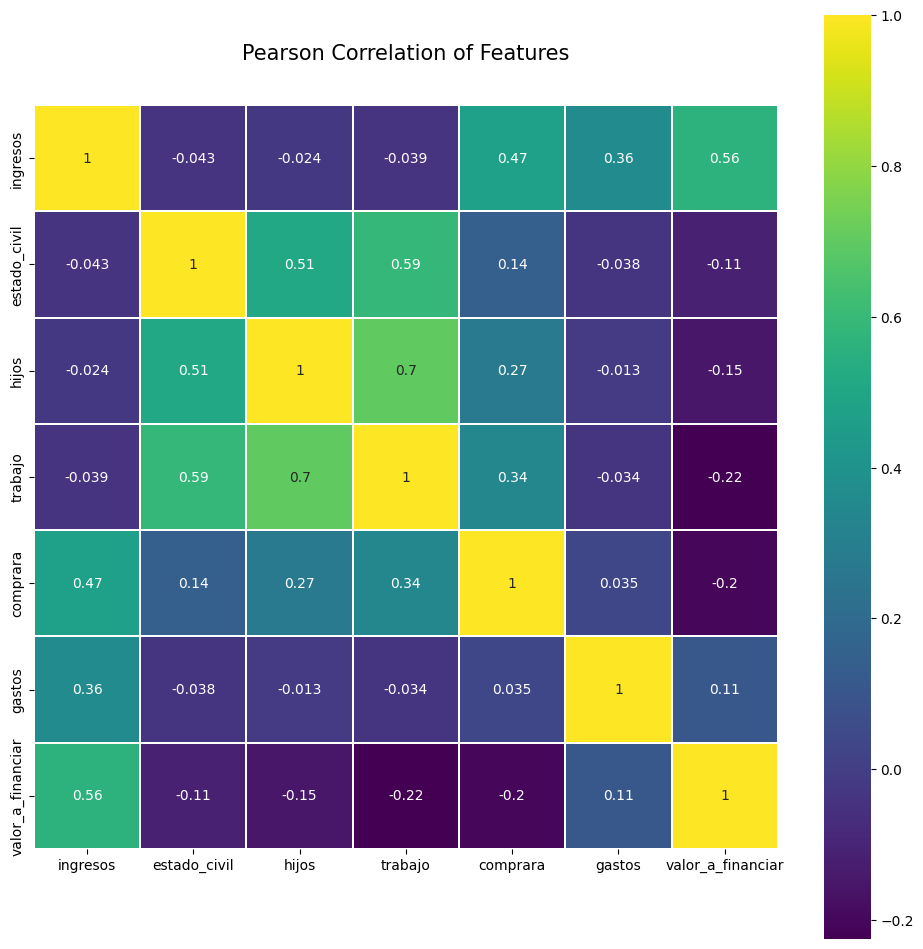

In [33]:
colormap = plt.cm.viridis#Color
plt.figure(figsize=(12,12))#Tamaño
plt.title('Pearson Correlation of Features', y=1.05, size=15)#Titulo, tamaño de recuadros
#Graficar
sb.heatmap(dfMinable.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

#Ver que varancia es la mayor y la dejamos

In [34]:
df['hijos'].var()

1.870966947441013

In [35]:
df['trabajo'].var()

6.430249741392048

In [36]:
#Quitar los hijos
dfMinable2 = dfMinable.drop('hijos',axis= 1)

In [37]:
dfMinable2

,ingresos,estado_civil,trabajo,comprara,gastos,valor_a_financiar
0,6000,0,2,1,1600,350000
1,6745,1,6,0,1496,593657
2,6455,2,8,1,1926,264316
3,7098,0,3,0,1547,606427
4,6167,0,3,1,1606,307420
...,...,...,...,...,...,...
197,3831,0,2,0,1530,352397
198,3961,2,8,0,1775,258541
199,3184,1,8,0,1915,352460
200,3334,1,5,0,1888,356907


In [38]:
# Ejecutar todo nuevamente
X = dfMinable2.drop(['comprara'], axis = 1) 
y = dfMinable2.comprara
# Particionar
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=124)
# Crear
gnb2 = GaussianNB()
# Entrenar
gnb2.fit(Xtrain.values,ytrain)
# Predecir
ypredict = gnb2.predict(Xtest)
# Matriz confusion
matriz = confusion_matrix(ytest,ypredict)
matrizdf = pd.DataFrame(matriz)
# Nombrar columnas y filas
matrizdf.columns = ['0_NO_compra_Real', '1_SI_compra_Real' ]
matrizdf.rename(index = {0:'NO_compra_PRED',1:'SI_compra_PRED'}) 
print(matrizdf)
# Calcular Accuracy
print(accuracy_score(ytest,ypredict))

   0_NO_compra_Real  1_SI_compra_Real
0                28                 0
1                 1                12
0.975609756097561


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [39]:
#Otra herramienta para medir metricas -Clasification Report
print(classification_report(y_test,yPrediccion, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.92      0.96        13

    accuracy                           0.98        41
   macro avg       0.98      0.96      0.97        41
weighted avg       0.98      0.98      0.98        41



#Seleccionar las mejores caracteristicas usando la libreria de Sklearn

In [40]:
mejores = SelectKBest(k=4) #Escoger las 4 caracteristicas
X = dfMinable.drop(['comprara'], axis = 1) 
y = dfMinable.comprara
arregloMinable3 = mejores.fit_transform(X,y)
arregloMinable3

array([[  6000,      2,      2, 350000],
       [  6745,      3,      6, 593657],
       [  6455,      1,      8, 264316],
       [  7098,      0,      3, 606427],
       [  6167,      0,      3, 307420],
       [  5692,      4,      5, 309988],
       [  6830,      1,      5, 383051],
       [  6470,      0,      1, 548852],
       [  6251,      0,      3, 240507],
       [  6987,      1,      7, 283487],
       [  7273,      0,      0, 538632],
       [  5058,      0,      2, 375498],
       [  5663,      3,      6, 457000],
       [  6139,      3,      8, 267801],
       [  7567,      2,      5, 599501],
       [  5749,      0,      4, 254865],
       [  5685,      2,      8, 298862],
       [  6722,      2,      7, 527691],
       [  7705,      0,      2, 532001],
       [  6038,      1,      7, 216945],
       [  6840,      0,      0, 405826],
       [  6519,      1,      8, 499336],
       [  7831,      0,      1, 590605],
       [  6717,      1,      8, 246104],
       [  5099, 

In [41]:
seleccionados =  mejores.get_support(indices=True)#Recomienda las 4 columnas
X.columns[seleccionados]

Index(['ingresos', 'hijos', 'trabajo', 'valor_a_financiar'], dtype='object')

In [42]:
features_Usar = X.columns[seleccionados]
X = dfMinable[features_Usar] 
y = dfMinable.comprara

In [43]:
X

,ingresos,hijos,trabajo,valor_a_financiar
0,6000,2,2,350000
1,6745,3,6,593657
2,6455,1,8,264316
3,7098,0,3,606427
4,6167,0,3,307420
...,...,...,...,...
197,3831,0,2,352397
198,3961,3,8,258541
199,3184,3,8,352460
200,3334,2,5,356907


In [44]:
y

0      1
1      0
2      1
3      0
4      1
      ..
197    0
198    0
199    0
200    0
201    0
Name: comprara, Length: 202, dtype: int64

In [45]:
# Particionar
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=124)
# Crear
gnb3 = GaussianNB()
# Entrenar
gnb3.fit(Xtrain.values,ytrain)
# Predecir
ypredict = gnb3.predict(Xtest)
# Matriz confusion
matriz = confusion_matrix(ytest,ypredict)
matrizdf = pd.DataFrame(matriz)
# Nombrar columnas y filas
matrizdf.columns = ['0_NO_compra_Real', '1_SI_compra_Real' ]
matrizdf.rename(index = {0:'NO_compra_PRED',1:'SI_compra_PRED'}) 
print(matrizdf)
# Calcular Accuracy
print(accuracy_score(ytest,ypredict))
print('Precisión en el set de Entrenamiento: {:.2f}'.format(gnb3.score(Xtrain, ytrain)))
print('Precisión en el set de Test: {:.2f}'.format(gnb3.score(Xtest, ytest)))
print(classification_report(ytest,yPrediccion, labels=[0,1]))

   0_NO_compra_Real  1_SI_compra_Real
0                28                 0
1                 1                12
0.975609756097561
Precisión en el set de Entrenamiento: 0.87
Precisión en el set de Test: 0.98
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.92      0.96        13

    accuracy                           0.98        41
   macro avg       0.98      0.96      0.97        41
weighted avg       0.98      0.98      0.98        41



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [46]:
Xtrain

,ingresos,hijos,trabajo,valor_a_financiar
8,6251,0,3,240507
81,4927,0,3,245460
198,3961,3,8,258541
80,3218,1,6,291817
102,6332,0,3,609526
...,...,...,...,...
169,3641,3,7,245526
194,2969,2,6,259542
135,5514,0,0,330023
17,6722,2,7,527691


#Curva roc

In [47]:
#Calcular varables de predicción solo clases postivias:

prob_y_3 = gnb3.predict_proba(Xtrain)
prob_y_3 = [p[1] for p in prob_y_3]
prob_y_3

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


[0.6612967787804093,
 0.4402829232803739,
 0.2880268922080644,
 0.08593803336660662,
 0.028776053969859727,
 0.7729960731315862,
 0.07492721178633126,
 0.4123410672594006,
 0.7589798588133972,
 0.34137104114023464,
 0.11532800879884557,
 0.2323811874448267,
 0.05834159941303842,
 0.03420565419901873,
 0.02450470683474164,
 0.6433080526976894,
 0.18439589575904605,
 0.46627190682488817,
 0.07092316784792199,
 0.16085234295744139,
 0.6119603038568503,
 0.10734013881515726,
 0.26615164717329515,
 0.7607023432939176,
 0.7586286693300109,
 0.0099502911037981,
 0.6045234472987167,
 0.1132308250325891,
 0.020972619523429912,
 0.7343717327645688,
 0.6589435934194141,
 0.7429786852598057,
 0.4813290752795667,
 0.03653605820408873,
 0.03515235954658461,
 0.3615956499022882,
 0.13027993100420454,
 0.5069578479413144,
 0.03455350944759809,
 0.19023027193234263,
 0.11242958753821428,
 0.7661563895309258,
 0.009499009661883941,
 0.19450524672385783,
 0.006529123540567975,
 0.3912551394081601,
 0.260

In [48]:
#Calcular el area bajo la Curva roc
roc_auc_score(ytrain, prob_y_3)

0.9451367255105573

In [54]:
#Nota: Guardar el modelo en un archivo, para entregarse a un programador para que haga una aplicación
#Me gane mi primer millon!!!!

In [51]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
joblib.dump(gnb3, 'modelo_GNB_Vivienda.pkl') # Guardo el modelo.

['modelo_GNB_Vivienda.pkl']